# Linear Regression with `tidymodels`

In this tutorial, we will learn about linear regression with `tidymodels`. We will start by fitting a linear regression model to the `advertising` data set that is used throughout chapter 3 of our course textbook, [An Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/)

Then we will focus on building our first machine learning pipeline, with data resampling, featuring engineering, modeling fitting, and model accuracy assessment using the `workflows`, `rsample`, `recipes`, `parsnip`, and `tune` packages from `tidymodels`.

# Introduction to Linear Regression

The `R` code below will load the data and packages we will be working with throughout this tutorial. The `vip` package is used for exploring predictor variable importance. We will use this package for visualizing which predictors have the most predictive power in our linear regression models.

In [51]:
# Install required packages for variable importance
install.packages('vip', repos = 'https://mran.microsoft.com/snapshot/2023-01-01/')

Installing vip [0.3.2] ...
	OK [linked cache]


In [52]:
# Load libraries
library(tidymodels)
library(vip) # for variable importance

# Load data sets
advertising <-   readRDS(url('https://gmubusinessanalytics.netlify.app/data/advertising.rds'))

home_sales <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/home_sales.rds')) %>% 
  select(-selling_date)


## Data

We will be working with the `advertisting` data set, where each row represents a store from a large retail chain and their associated sales revenue and advertising budgets, and the `home_sales` data, where each row represents a real estate home sale in the Seattle area between 2014 and 2015.

Take a moment to explore these data sets below.

### Advertising

In [53]:
advertising

Sales,TV,Radio,Newspaper
<dbl>,<dbl>,<dbl>,<dbl>
22.1,230.1,37.8,69.2
10.4,44.5,39.3,45.1
9.3,17.2,45.9,69.3
18.5,151.5,41.3,58.5
12.9,180.8,10.8,58.4
7.2,8.7,48.9,75.0
11.8,57.5,32.8,23.5
13.2,120.2,19.6,11.6
4.8,8.6,2.1,1.0


### Seattle Home Sales



In [54]:
home_sales

selling_price,city,house_age,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_basement,floors,scenic_views
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
280000,Auburn,23,6,3.00,2400,9373,0,2,0
487000,Seattle,9,4,2.50,2540,5001,0,2,0
465000,Seattle,0,3,2.25,1530,1245,480,2,0
411000,Seattle,7,2,2.00,1130,1148,330,2,0
570000,Bellevue,16,3,2.50,1530,3296,0,2,0
546000,Bellevue,16,3,2.50,1530,3464,0,2,0
617000,Bellevue,16,3,2.50,1910,4488,0,2,0
635000,Kirkland,9,3,2.50,3350,4007,800,2,0
872750,Redmond,24,3,2.50,2870,13695,0,2,0


## Data Splitting

The first step in building regression models is to split our original data into a training and test set. We then perform all feature engineering and model fitting tasks on the training set and use the test set as an independent assessment of our model's prediction accuracy.

We will be using the `initial_split()` function from `rsample` to partition the `advertising` data into training and test sets. Remember to always use `set.seed()` to ensure your results are reproducible.

In [55]:
set.seed(314)

# Create a split object
advertising_split <- initial_split(advertising, prop = 0.75, 
                                   strata = Sales)

# Build training data set
advertising_training <- advertising_split %>% 
                        training()

# Build testing data set
advertising_test <- advertising_split %>% 
                    testing()

## Model Specification

<br>
<p align="center">
<img 
  src="./files/tidymodels_set_engine.png"
  width="auto"
  height="auto"
/>
</p>

<br>
Image source:

[@allisonhorst](https://allisonhorst.com/)

The next step in the process is to build a linear regression model object to which we fit our training data.

For every model type, such as linear regression, there are numerous packages (or engines) in `R` that can be used.

For example, we can use the `lm()` function from base `R` or the `stan_glm()` function from the `rstanarm` package. Both of these functions will fit a linear regression model to our data with slightly different implementations.

The `parsnip` package from `tidymodels` acts like an aggregator across the various modeling engines within `R`. This makes it easy to implement machine learning algorithms from different `R` packages with one unifying syntax.

To specify a model object with `parsnip`, we must:

1.  Pick a model type
2.  Set the engine
3.  Set the mode (either regression or classification)

Linear regression is implemented with the `linear_reg()` function in `parsnip`. To the set the engine and mode, we use `set_engine()` and `set_mode()` respectively. Each one of these functions takes a parsnip object as an argument and updates its properties.

To explore all `parsnip` models, please see the [documentation](https://www.tidymodels.org/find/parsnip/) where you can search by keyword.

Let's create a linear regression model object with the `lm` engine. This is the default engine for most applications.

In [56]:
lm_model <- linear_reg() %>% 
            set_engine('lm') %>% # adds lm implementation of linear regression
            set_mode('regression')

# View object properties
lm_model

Linear Regression Model Specification (regression)

Computational engine: lm 


## Fitting to Training Data

Now we are ready to train our model object on the `advertising_training` data. We can do this using the `fit()` function from the `parsnip` package. The `fit()` function takes the following arguments:

-   a `parnsip` model object specification
-   a model formula
-   a data frame with the training data


The code below trains our linear regression model on the `advertising_training` data. In our formula, we have specified that `Sales` is the response variable and `TV`, `Radio`, and `Newspaper` are our predictor variables.

We have assigned the name `lm_fit` to our trained linear regression model.

In [57]:
lm_fit <- lm_model %>% 
          fit(Sales ~ ., data = advertising_training)

# View lm_fit properties
lm_fit

parsnip model object


Call:
stats::lm(formula = Sales ~ ., data = data)

Coefficients:
(Intercept)           TV        Radio    Newspaper  
   2.904355     0.045966     0.184324     0.002369  


### Exploring Training Results

As mentioned in the first R tutorial, most model objects in `R` are stored as specialized lists.

The `lm_fit` object is list that contains all of the information about how our model was trained as well as the detailed results. Let's use the `names()` function to print the named objects that are stored within `lm_fit`.

The important objects are `fit` and `preproc`. These contain the trained model and pre-processing steps (if any are used), respectively. <br>

In [58]:
names(lm_fit)

[1] "lvl"     "spec"    "fit"     "preproc" "elapsed"

<br>

To print a summary of our model, we can extract `fit` from `lm_fit` and pass it to the `summary()` function. We can explore the estimated coefficients, F-statistics, p-values, residual standard error (also known as RMSE) and R2 value.

However, this feature is best for visually exploring our results on the training data since the results are not returned as a data frame. In the coming sections, we will explore numerous functions that can automatically extract this information from a linear regression results object.

Below, we use the `pluck()` function from `dplyr` to extract the `fit`results from `lm_fit`. This is the same as using `lm_fit$fit` or `lm_fit[['fit']]`.

In [59]:
lm_fit %>% 
  # Extract fit element from the list
  pluck('fit') %>% 
  # Pass to summary function
  summary()


Call:
stats::lm(formula = Sales ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6564 -0.9024  0.2466  1.2489  2.8013 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.904355   0.386488   7.515 5.55e-12 ***
TV          0.045966   0.001730  26.568  < 2e-16 ***
Radio       0.184324   0.010178  18.110  < 2e-16 ***
Newspaper   0.002369   0.007095   0.334    0.739    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.766 on 144 degrees of freedom
Multiple R-squared:  0.8866,	Adjusted R-squared:  0.8842 
F-statistic: 375.2 on 3 and 144 DF,  p-value: < 2.2e-16


<br>
We can use the `plot()` function to obtain diagnostic plots for our trained regression model. Again, we must first extract the `fit` object from `lm_fit` and then pass it into `plot()`. These plots provide a check for the main assumptions of the linear regression model.

In [60]:
# This code adjust the figure output size
options(repr.plot.width=11, repr.plot.height=8)

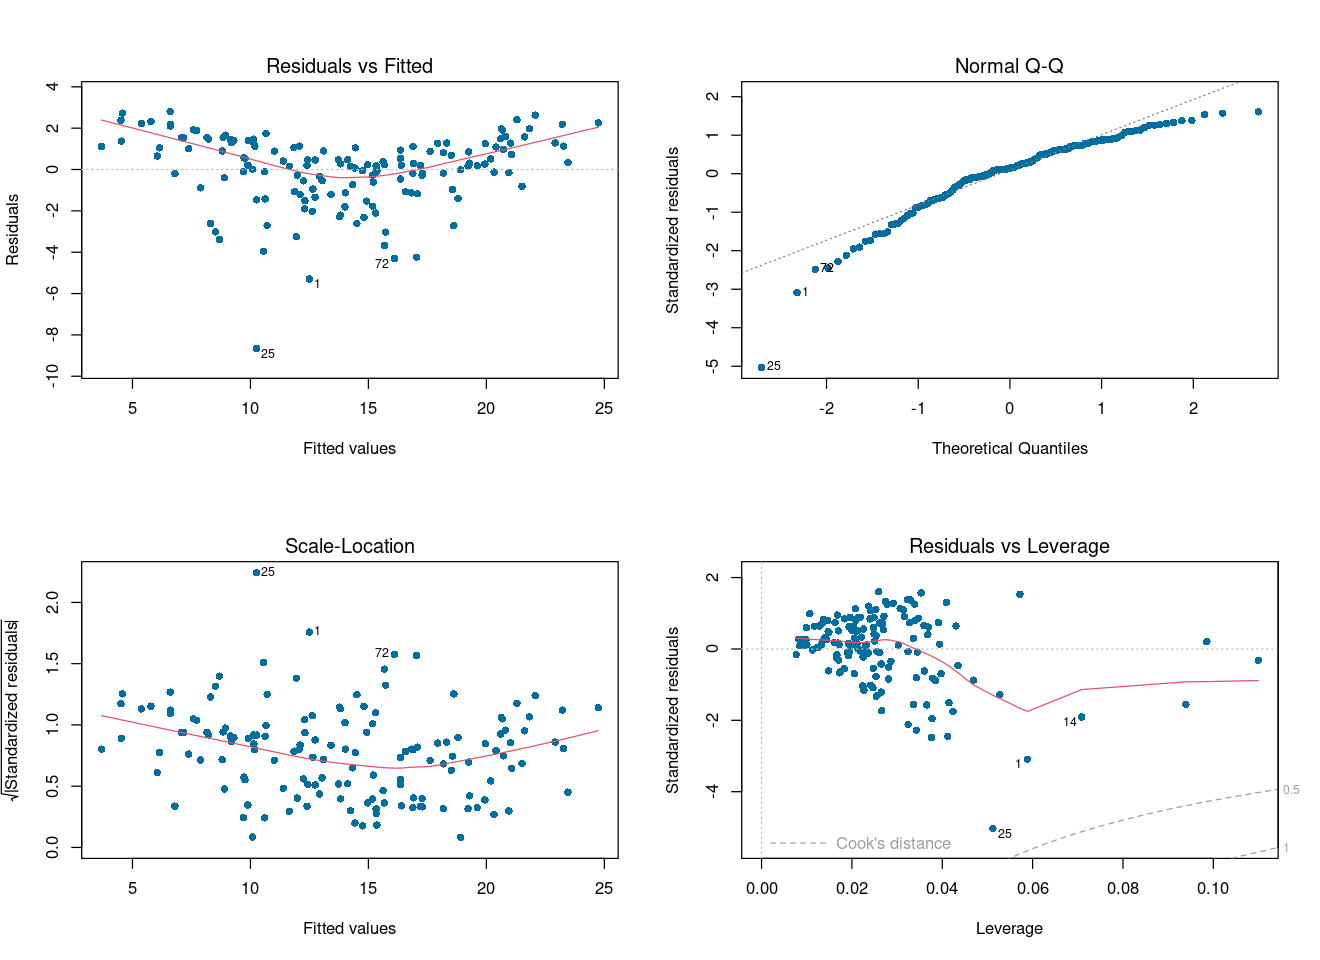

In [61]:
par(mfrow=c(2,2)) # plot all 4 plots in one

lm_fit %>% 
  pluck('fit') %>% 
  plot(pch = 16,    # optional parameters to make points blue
       col = '#006EA1')

### Tidy Training Results

To obtain the detailed results from our trained linear regression model in a data frame, we can use the `tidy()` and `glance()` functions directly on our trained `parsnip` model, `lm_fit`.

The `tidy()` function takes a linear regression object and returns a data frame of the estimated model coefficients and their associated F-statistics and p-values.

The `glance()` function will return performance metrics obtained on the training data such as the R2 value (`r.squared`) and the RMSE (`sigma`).

In [62]:
# Data frame of estimated coefficients
tidy(lm_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.904355189,0.386487783,7.5147400,5.548443e-12
TV,0.045966046,0.001730100,26.5684372,2.238704e-57
Radio,0.184324269,0.010178219,18.1096779,6.034582e-39
Newspaper,0.002369146,0.007094623,0.3339355,7.389141e-01


In [63]:
# Performance metrics on training data
glance(lm_fit)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.8865833,0.8842204,1.766473,375.218,7.840923e-68,3,-292.1851,594.3702,609.3563,449.3413,144,148


<br>

We can also use the `vip()` function to plot the variable importance for each predictor in our model. The importance value is determined based on the F-statistics and estimate coefficents in our trained model object.

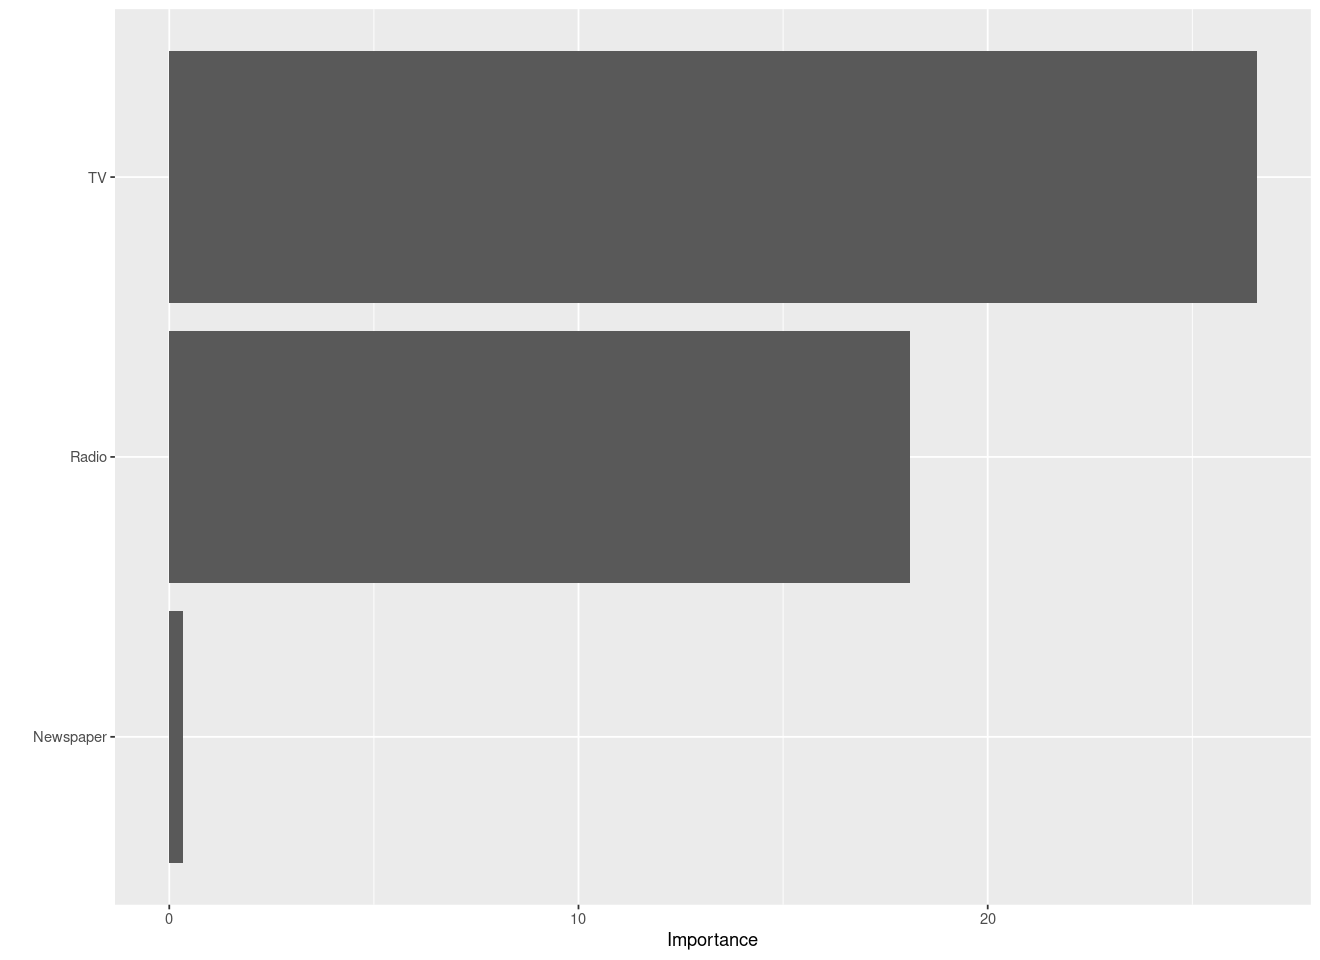

In [64]:
vip(lm_fit)

## Evaluating Test Set Accuracy

To assess the accuracy of our trained linear regression model, `lm_fit`, we must use it to make predictions on our test data, `advertising_test`.

This is done with the `predict()` function from `parnsip`. This function takes two important arguments:

<br>

-   a trained `parnsip` model object
-   `new_data` for which to generate predictions

<br>

The code below uses the `predict` function to generate a data frame with a single column, `.pred`, which contains the predicted `Sales` values on the `advertisting_test` data.

In [65]:
predict(lm_fit, new_data = advertising_test)

.pred
<dbl>
12.319637
13.344077
18.459274
6.559373
8.133881
14.903456
19.390149
21.686534
11.392613


<br>

Generally it's best to combine the test data set and the predictions into a single data frame. We create a data frame with the predictions on the `advertising_test` data and then use `bind_cols` to add the `advertising_test` data to the results.

Now we have the model results and the test data in a single data frame.

In [66]:
advertising_test_results <- predict(lm_fit, new_data = advertising_test) %>% 
                            bind_cols(advertising_test)

# View results
advertising_test_results

.pred,Sales,TV,Radio,Newspaper
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12.319637,9.3,17.2,45.9,69.3
13.344077,12.9,180.8,10.8,58.4
18.459274,19.0,204.1,32.9,46.0
6.559373,5.6,13.2,15.9,49.6
8.133881,9.7,62.3,12.6,18.3
14.903456,15.0,142.9,29.3,12.6
19.390149,18.9,248.8,27.1,22.9
21.686534,21.4,292.9,28.3,43.2
11.392613,11.9,112.9,17.4,38.6


### Calculating RMSE and R<sup>2</sup> on the Test Data

To obtain the RMSE and R<sup>2</sup> values on our test set results, we can use the `rmse()` and `rsq()` functions.

Both functions take the following arguments:

<br>

-   `data` - a data frame with columns that have the true values and predictions
-   `truth` - the column with the true response values
-   `estimate` - the column with predicted values

<br>

In the examples below we pass our `advertising_test_results` to these functions to obtain these values for our test set. results are always returned as a data frame with the following columns: `.metric`, `.estimator`, and `.estimate`.

In [67]:
# RMSE on test set
rmse(advertising_test_results, 
     truth = Sales,
     estimate = .pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.446265


In [68]:
# R2 on test set
rsq(advertising_test_results,
    truth = Sales,
    estimate = .pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.925196


### R<sup>2</sup> Plot

The best way to assess the test set accuracy is by making an R<sup>2</sup> plot. This is a plot that can be used for any regression model.

It plots the actual values (`Sales`) versus the model predictions (`.pred`) as a scatter plot. It also plot the line `y = x` through the origin. This line is a visually representation of the perfect model where all predicted values are equal to the true values in the test set. The farther the points are from this line, the worse the model fit.

The reason this plot is called an R<sup>2</sup> plot, is because the R<sup>2</sup> is simply the squared correlation between the true and predicted values, which are plotted as paired in the plot.

In the code below, we use `geom_point()` and `geom_abline()` to make this plot using out `advertising_test_results` data. The `geom_abline()` function will plot a line with the provided `slope` and `intercept` arguments. The `coord_obs_pred()` function scales the x and y axis to have the same range for accurate comparisons.

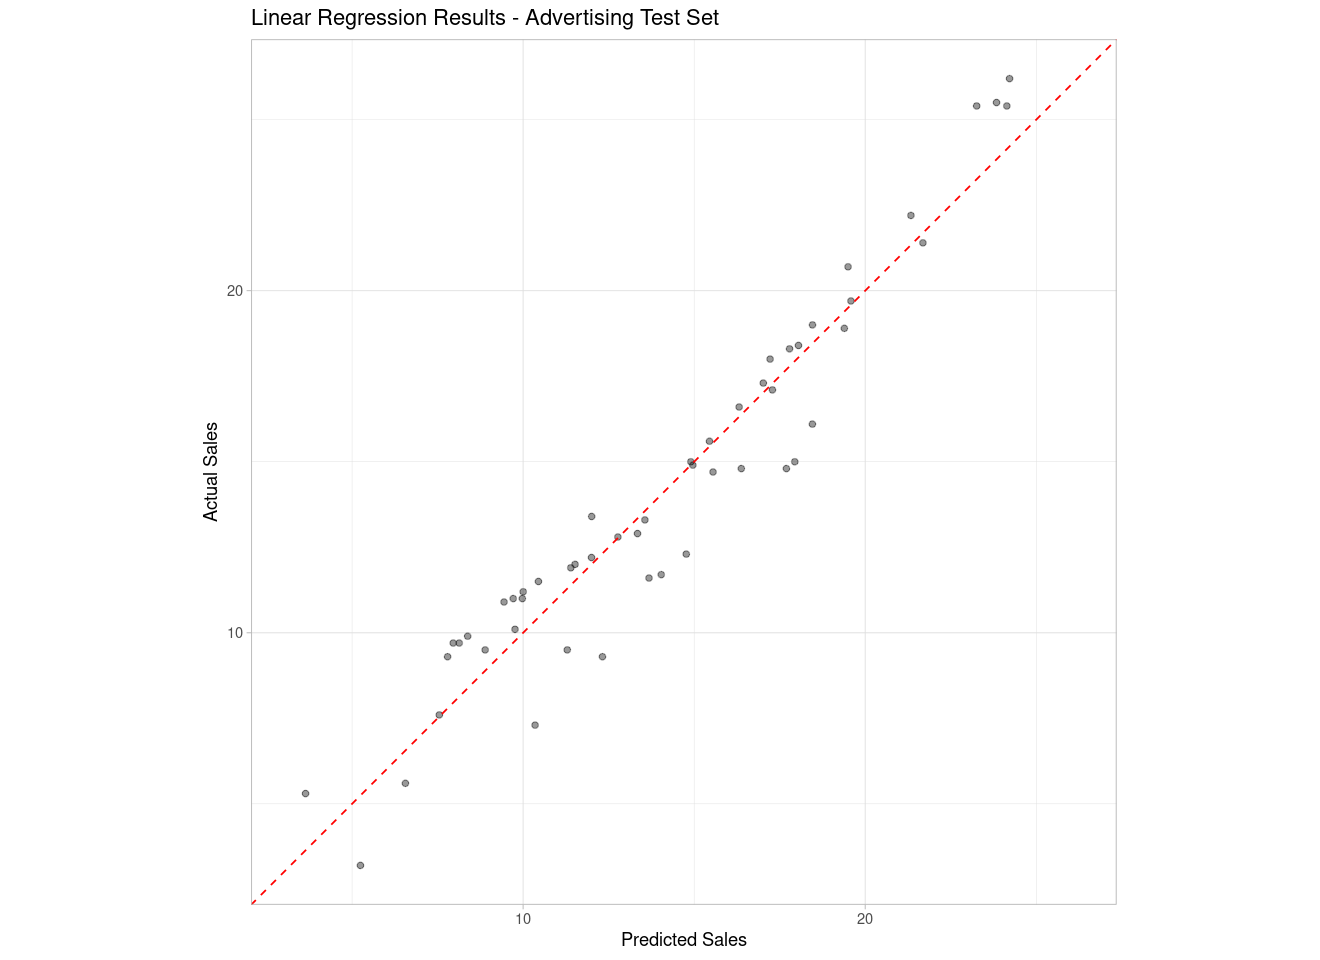

In [69]:
ggplot(data = advertising_test_results,
       mapping = aes(x = .pred, y = Sales)) +
  geom_point(alpha = 0.4) +
  geom_abline(intercept = 0, slope = 1, linetype = 2, color = 'red') +
  coord_obs_pred() +
  labs(title = 'Linear Regression Results - Advertising Test Set',
       x = 'Predicted Sales',
       y = 'Actual Sales') +
  theme_light()

# Creating a Machine Learning Workflow

In the previous section, we trained a linear regression model to the `advertising` data step-by-step. In this section, we will go over how to combine all of the modeling steps into a single workflow.

We will be using the `workflow` package, which combines a `parnsip` model with a `recipe`, and the `last_fit()` function to build an end-to-end modeling training pipeline.

Let's assume we would like to do the following with the `advertising` data:

1.  Split our data into training and test sets
2.  Feature engineer the training data by removing skewness and normalizing numeric predictors
3.  Specify a linear regression model
4.  Train our model on the training data
5.  Transform the test data with steps learned in part 2 and obtain predictions using our trained model

<br> 

The machine learning workflow can be accomplished with a few steps using `tidymodels`

## Step 1. Split Our Data

First we split our data into training and test sets.

In [70]:
set.seed(314)

# Create a split object
advertising_split <- initial_split(advertising, prop = 0.75, 
                                   strata = Sales)

# Build training data set
advertising_training <- advertising_split %>% 
                        training()

# Build testing data set
advertising_test <- advertising_split %>% 
                    testing()

## Step 2. Feature Engineering

Next, we specify our feature engineering recipe. In this step, we **do not** use `prep()` or `bake()`. This recipe will be automatically applied in a later step using the `workflow()` and `last_fit()` functions.

In [71]:
advertising_recipe <- recipe(Sales ~ ., data = advertising_training) %>% 
                      step_YeoJohnson(all_numeric(), -all_outcomes()) %>% 
                      step_normalize(all_numeric(), -all_outcomes())

## Step 3. Specify a Model

Next, we specify our linear regression model with `parsnip`.

In [72]:
lm_model <- linear_reg() %>% 
            set_engine('lm') %>% 
            set_mode('regression')

## Step 4. Create a Workflow

The `workflow` package was designed to combine models and recipes into a single object. To create a workflow, we start with `workflow()` to create an empty workflow and then add out model and recipe with `add_model()` and `add_recipe()`.

In [73]:
advertising_workflow <- workflow() %>% 
                        add_model(lm_model) %>% 
                        add_recipe(advertising_recipe)

## Step 5. Execute the Workflow

The `last_fit()` function will take a workflow object and apply the recipe and model to a specified data split object.

In the code below, we pass the `advertising_workflow` object and `advertising_split` object into `last_fit()`.

The `last_fit()` function will then train the feature engineering steps on the training data, fit the model to the training data, apply the feature engineering steps to the test data, and calculate the predictions on the test data, **all in one step**!

In [74]:
advertising_fit <- advertising_workflow %>% 
                   last_fit(split = advertising_split)

<br>

To obtain the performance metrics and predictions on the test set, we use the `collect_metrics()` and `collect_predictions()` functions on our `advertising_fit` object.

In [75]:
# Obtain performance metrics on test data
advertising_fit %>% collect_metrics()

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
rmse,standard,1.4081601,Preprocessor1_Model1
rsq,standard,0.9294198,Preprocessor1_Model1


<br>
We can save the test set predictions by using the `collect_predictions()` function. This function returns a data frame which will have the response variables values from the test set and a column named `.pred` with the model predictions.

In [76]:
# Obtain test set predictions data frame
test_results <- advertising_fit %>% 
                collect_predictions()
# View results
test_results

id,.pred,.row,Sales,.config
<chr>,<dbl>,<int>,<dbl>,<chr>
train/test split,11.358031,3,9.3,Preprocessor1_Model1
train/test split,14.015771,5,12.9,Preprocessor1_Model1
train/test split,18.788917,15,19.0,Preprocessor1_Model1
train/test split,6.333969,23,5.6,Preprocessor1_Model1
train/test split,8.633831,25,9.7,Preprocessor1_Model1
train/test split,15.447423,27,15.0,Preprocessor1_Model1
train/test split,19.515314,29,18.9,Preprocessor1_Model1
train/test split,21.472832,31,21.4,Preprocessor1_Model1
train/test split,12.268180,32,11.9,Preprocessor1_Model1


# Workflow for Home Selling Price

For another example of fitting a machine learning workflow, let's use linear regression to predict the selling price of homes using the `home_sales` data.

For our feature engineering steps, we will include removing skewness and normalizing numeric predictors, and creating dummy variables for the `city` variable.

Remember that all machine learning algorithms need a numeric feature matrix. Therefore we must also transform character or factor predictor variables to dummy variables.

<br>

## Step 1. Split Our Data

First we split our data into training and test sets.

In [77]:
set.seed(271)

# Create a split object
homes_split <- initial_split(home_sales, prop = 0.75, 
                             strata = selling_price)

# Build training data set
homes_training <- homes_split %>% 
                  training()

# Build testing data set
homes_test <- homes_split %>% 
              testing()

## Step 2. Feature Engineering

Next, we specify our feature engineering recipe. In this step, we **do not** use `prep()` or `bake()`. This recipe will be automatically applied in a later step using the `workflow()` and `last_fit()` functions.

For our model formula, we are specifying that `selling_price` is our response variable and all others are predictor variables.

In [78]:
homes_recipe <- recipe(selling_price ~ ., data = homes_training) %>% 
                step_YeoJohnson(all_numeric(), -all_outcomes()) %>% 
                step_normalize(all_numeric(), -all_outcomes()) %>% 
                step_dummy(all_nominal(), - all_outcomes())

<br>

As an intermediate step, let's check our recipe by prepping it on the training data and applying it to the test data. We want to make sure that we get the correct transformations.

From the results below, things look correct.

In [79]:
homes_recipe %>% 
  prep(training = homes_training) %>% 
  bake(new_data = homes_test)

house_age,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_basement,floors,scenic_views,selling_price,city_Bellevue,⋯,city_Kent,city_Kirkland,city_Maple.Valley,city_North.Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Woodinville
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.02167885,3.0729663,0.96535237,0.25021807,0.504198423,-0.5419884,0.0558618,-0.2108066,280000,0,⋯,0,0,0,0,0,0,0,0,0,0
0.74859106,-0.5618516,1.91221731,1.13175952,0.584697559,1.8573417,0.0558618,-0.2108066,795000,0,⋯,0,0,0,0,1,0,0,0,0,0
0.84117499,0.7151545,0.46785363,1.07106189,0.829432582,1.8661040,0.0558618,-0.2108066,835000,0,⋯,0,0,0,0,1,0,0,0,0,0
0.65431572,-0.5618516,-0.04791317,0.51560566,0.477769402,-0.5419884,0.0558618,-0.2108066,738000,0,⋯,0,0,0,0,1,0,0,0,0,0
-0.41800752,0.7151545,-0.04791317,1.95195879,0.670174123,-0.5419884,0.0558618,-0.2108066,885000,0,⋯,0,0,0,0,0,0,1,0,0,0
-0.67607634,0.7151545,2.80375915,1.22119400,0.406374580,-0.5419884,0.0558618,-0.2108066,785500,0,⋯,0,0,0,0,0,0,1,0,0,0
-0.41800752,0.7151545,-0.04791317,1.77393482,0.253773360,-0.5419884,0.0558618,-0.2108066,815000,0,⋯,0,0,0,0,0,0,1,0,0,0
-0.96020933,-0.5618516,-0.04791317,-1.04592883,-0.660667334,-0.5419884,0.0558618,-0.2108066,330000,0,⋯,0,0,0,0,0,1,0,0,0,0
1.44955285,-0.5618516,-0.04791317,-0.50558466,0.178676273,-0.5419884,0.0558618,-0.2108066,268000,0,⋯,0,0,0,0,0,0,0,0,0,0


## Step 3. Specify a Model

Next, we specify our linear regression model with `parsnip`.

In [80]:
lm_model <- linear_reg() %>% 
            set_engine('lm') %>% 
            set_mode('regression')

## Step 4. Create a Workflow

Next, we combine our model and recipe into a workflow object.

In [81]:
homes_workflow <- workflow() %>% 
                  add_model(lm_model) %>% 
                  add_recipe(homes_recipe)

## Step 5. Execute the Workflow

Finally, we process our machine learning workflow with `last_fit()`.

In [82]:
homes_fit <- homes_workflow %>% 
             last_fit(split = homes_split)

<br>
To obtain the performance metrics and predictions on the test set, we use the `collect_metrics()` and `collect_predictions()` functions on our `homes_fit` object.

In [83]:
# Obtain performance metrics on test data
homes_fit %>% 
  collect_metrics()

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
rmse,standard,9.291110e+04,Preprocessor1_Model1
rsq,standard,7.461099e-01,Preprocessor1_Model1


<br>
We can save the test set predictions by using the `collect_predictions()` function. This function returns a data frame which will have the response variables values from the test set and a column named `.pred` with the model predictions.

In [84]:
# Obtain test set predictions data frame
homes_results <- homes_fit %>% 
                 collect_predictions()
# View results
homes_results

id,.pred,.row,selling_price,.config
<chr>,<dbl>,<int>,<dbl>,<chr>
train/test split,311719.6,1,280000,Preprocessor1_Model1
train/test split,777525.1,13,795000,Preprocessor1_Model1
train/test split,747543.9,14,835000,Preprocessor1_Model1
train/test split,697076.4,18,738000,Preprocessor1_Model1
train/test split,858350.9,40,885000,Preprocessor1_Model1
train/test split,786018.7,42,785500,Preprocessor1_Model1
train/test split,828049.9,47,815000,Preprocessor1_Model1
train/test split,329903.9,50,330000,Preprocessor1_Model1
train/test split,267021.3,53,268000,Preprocessor1_Model1


### R<sup>2</sup> Plot

Finally, let's use the `homes_results` data frame to make an R<sup>2</sup> plot to visualize our model performance on the test data set.

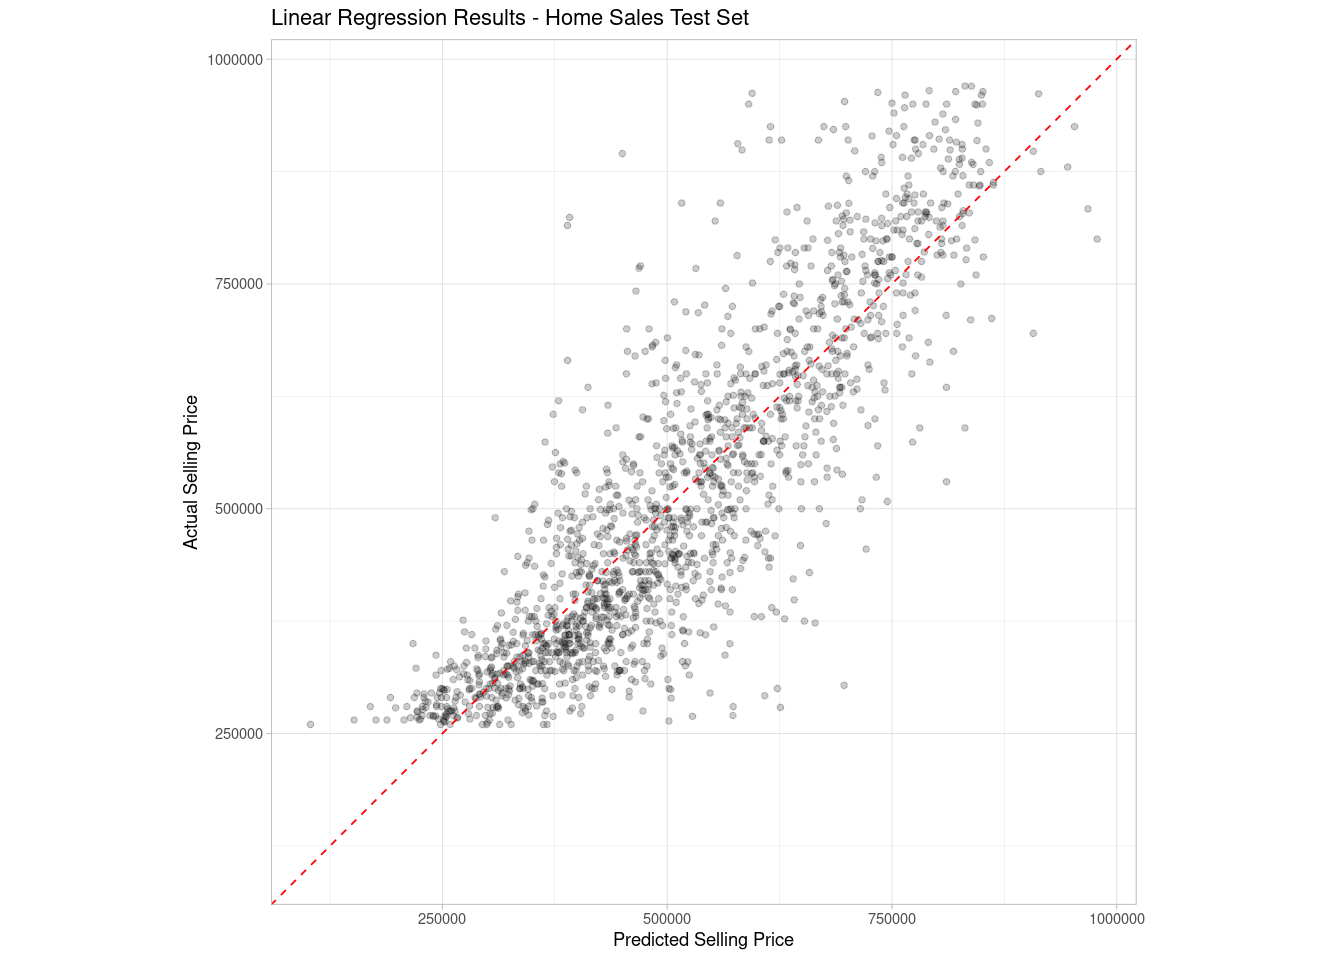

In [85]:
ggplot(data = homes_results,
       mapping = aes(x = .pred, y = selling_price)) +
  geom_point(alpha = 0.2) +
  geom_abline(intercept = 0, slope = 1, color = 'red', linetype = 2) +
  coord_obs_pred() +
  labs(title = 'Linear Regression Results - Home Sales Test Set',
       x = 'Predicted Selling Price',
       y = 'Actual Selling Price') +
  theme_light()

### Variable Importance

Creating a workflow and using the `last_fit()` function is a great option of **automating** a machine learning pipeline. However, we are not able to explore variable importance on the training data when we fit our model with `last_fit()`.

To obtain a variable importance plot with `vip()`, we must use the methods introduced at the beginning of the tutorial. This involves fitting the model with the `fit()` function on the training data.

To do this, we will train our `homes_recipe` and transform our training data. Then we use the `fit()` function to train our linear regression object, `lm_model`, on our processed data.

Then we can use the `vip()` function to see which predictors were most important.

In [86]:
homes_training_baked <- homes_recipe %>% 
                        prep(training = homes_training) %>% 
                        bake(new_data = NULL)

# View results
homes_training_baked

house_age,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_basement,floors,scenic_views,selling_price,city_Bellevue,⋯,city_Kent,city_Kirkland,city_Maple.Valley,city_North.Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Woodinville
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1.67900641,0.7151545,-0.04791317,-0.44521724,-0.30588662,-0.5419884,0.0558618,-0.2108066,311850,0,⋯,1,0,0,0,0,0,0,0,0,0
-1.11574385,0.7151545,-0.04791317,0.56201608,-0.32551213,-0.5419884,0.0558618,-0.2108066,287000,0,⋯,1,0,0,0,0,0,0,0,0,0
1.28205916,0.7151545,-0.58400082,-0.26977461,0.26344172,-0.5419884,0.0558618,-0.2108066,324900,0,⋯,1,0,0,0,0,0,0,0,0,0
0.25770000,-0.5618516,-0.04791317,-0.31287039,0.33013471,-0.5419884,0.0558618,-0.2108066,359950,0,⋯,0,0,0,0,0,1,0,0,0,0
-0.81427181,0.7151545,-1.14287276,0.66452581,0.46626232,-0.5419884,-2.0779606,-0.2108066,333000,0,⋯,0,0,0,0,0,1,0,0,0,0
-1.11574385,-0.5618516,-0.58400082,-1.20871575,-0.16007013,-0.5419884,0.0558618,-0.2108066,355000,0,⋯,0,0,0,0,0,1,0,0,0,0
-0.96020933,-0.5618516,-0.04791317,-1.04592883,-0.64661554,-0.5419884,0.0558618,-0.2108066,333000,0,⋯,0,0,0,0,0,1,0,0,0,0
1.02167885,-0.5618516,-0.58400082,-0.92432457,0.32370063,-0.5419884,0.0558618,-0.2108066,263000,0,⋯,0,0,0,0,0,0,0,0,0,0
1.44955285,-0.5618516,-0.04791317,-1.11734555,0.25404343,1.8358801,-2.0779606,-0.2108066,276200,0,⋯,0,0,0,0,0,0,0,0,0,0


<br>
Now we fit our linear regression model to the baked training data.

In [87]:
homes_lm_fit <- lm_model %>% 
                fit(selling_price ~ ., data = homes_training_baked)

<br>
Finally, we use `vip()` on our trained linear regression model. It appears that square footage and location are the most importance predictor variables.

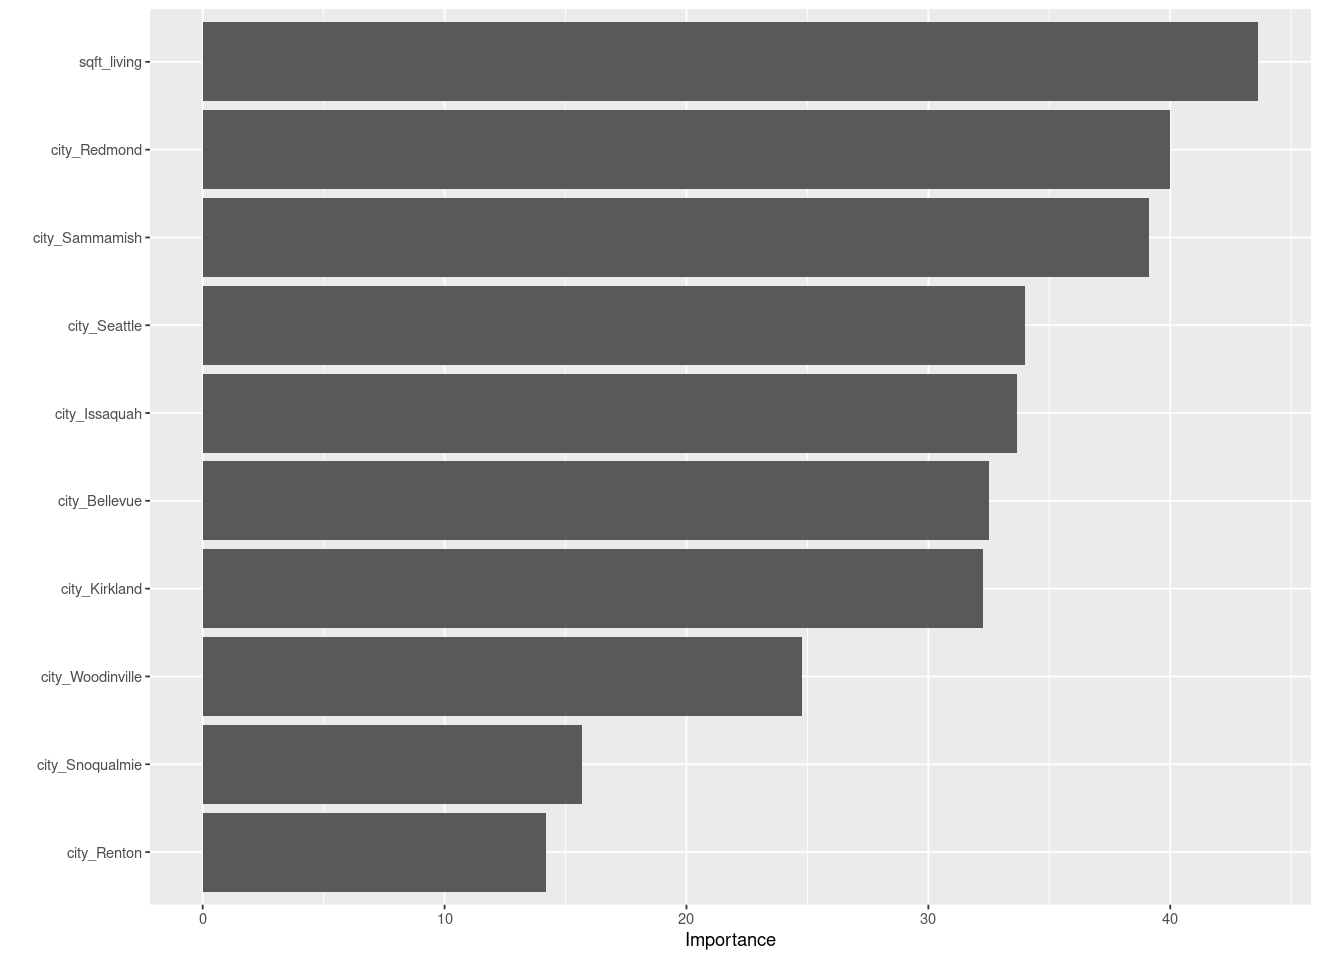

In [88]:
vip(homes_lm_fit)